This notebook intends to show the validation of the sincronization between servers.

The experiment has the following configuration:

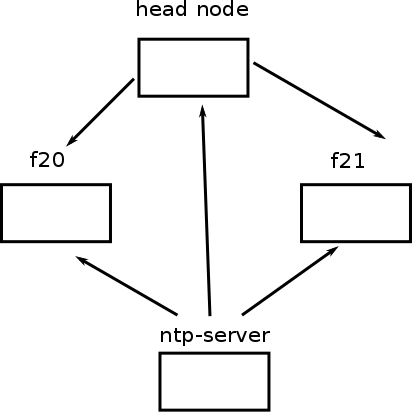

Three nodes are used in the experiment: the head node, f20, and f21. Their clocks are synchronized via ntp.

At the beginning of each experiment, the head node generates a reference time and sends to the f21 and f22 nodes. They will wait from the actual time until the sent reference time so they can start at barely the same time.

In this notebook we show the difference between the recorded timestamps (in milisseconds) for each individual sample. We can observe that the differences never exceeds 10 milisseconds, which indicates that the strategy works fine as long the NTP is well configured in the hosts.


In [1]:
# import numpy and pandas, and DataFrame / Series
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
# And some items for matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import logprocessing as lp
import io
from IPython.display import display, HTML

In [2]:
m =  lp.MetadataBuilder().load_cpu_cores(32).build()

query = {
        "header": "timestamp cpu1 io_write io_read net_down net_up memory power",
        "columns": "cpu0.timestamp, 100 - cpu0.idle, io.writet, io.readt, net.download, net.upload, memory.used, mean( energy.power_active )"
}

def dataframe_from_exp( d ):
    buffer = io.StringIO()

    p = lp.LogProcessor( 
        directory = d,
        meta = m,
        query = query,
        _file = buffer)

    p.process()
    buffer.flush()
    buffer.seek(0)
    df = pd.read_csv( buffer, delimiter=' ', index_col = False)
    buffer.close()
    
    return df
    

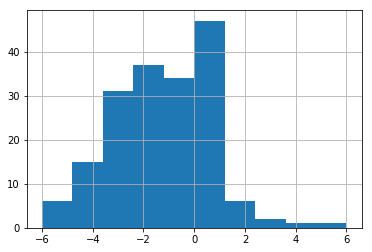

In [3]:
# The experiments run on two different servers, but the clocks were synchronized
# Each value from the resulting series is the difference in milisseconds.

df21 = dataframe_from_exp("/home/danilo/Workspace/Experiments0503/f21/one_server/experiments/experiment_100_60_5000_5000")
df22 = dataframe_from_exp("/home/danilo/Workspace/Experiments0503/f22/one_server/experiments/experiment_100_60_5000_5000")
pd.Series.hist(df21.timestamp - df22.timestamp)

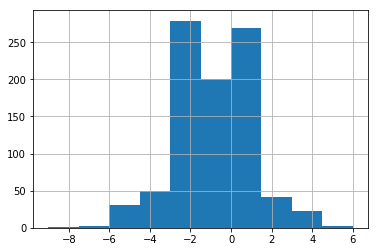

In [4]:
# again, using the whole experimental data

df21 = dataframe_from_exp("/home/danilo/Workspace/Experiments0503/f21/one_server")
df22 = dataframe_from_exp("/home/danilo/Workspace/Experiments0503/f22/one_server")
pd.Series.hist(df21.timestamp - df22.timestamp)

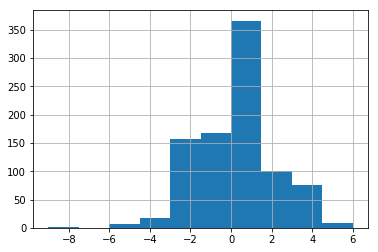

In [5]:
# again, using the whole experimental data

df21 = dataframe_from_exp("/home/danilo/Workspace/Experiments0503/f21/two_servers")
df22 = dataframe_from_exp("/home/danilo/Workspace/Experiments0503/f22/two_servers")
pd.Series.hist(df21.timestamp - df22.timestamp)

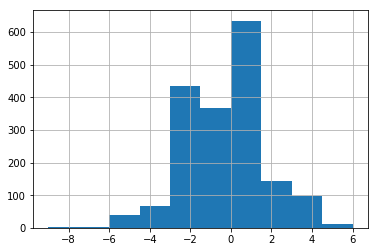

In [6]:
# again, using the whole experimental data

df21 = dataframe_from_exp("/home/danilo/Workspace/Experiments0503/f21")
df22 = dataframe_from_exp("/home/danilo/Workspace/Experiments0503/f22")
pd.Series.hist(df21.timestamp - df22.timestamp)